# Keywords Script:

* Wiederholen sie die aus dem PGP1 bekannten Konzepte:
    * Messunsicherheiten (Messfehler), statistische und systematische Unsicherheit
    * Korrelation und Antikorrelation
    * Gaussverteilung (Normalverteilung)
    * Arthmetirsches Mittel und Standardabweichung
    * Zentraler Grenzwertsatz
    * Wahrscheinlichkeitsverteilung
* Binominal-Verteilung (Not sure if needed)
* Poisson-Verteilung


# Aufgaben zur Vorbereitung:


* Verknüpfen des Zentralengrenzwertsatzs, der Normalverteilung und des arithmetrishen Mittels (in Python):
    1. Nimm random nicht Gaußverteilung, e.g., exponential decay
    2. Plotte Zerfallsverteilung.
    3. Ziehe 2, 5, 10, 100 verschieden "Messungen"
    4. Berechne Mittelwert von "gemessenen" Werte und plote

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np

# import iminuit

# print(iminuit.__version__)

In [6]:
# # Truth
# R = 10*10**3  # Ohm
# C = 10*10**-6  # F
# I0 = 10/R

# def discharge_current(t, I0, R, C):
#     return I0 * np.exp(-t/(R*C))


# time_truth = np.arange(0, 1, 0.1)


# # Make psuedo measured values:
# sigma_time = 0.02
# dtime = np.random.normal(0, sigma_time, len(time_truth))
# time_mess = time_truth + dtime

# sigma_current = 0.05
# current_truth = discharge_current(time_truth, I0, R, C)/10**-3
# current_mes = current_truth + np.random.normal(0, sigma_current, len(current_truth))


TODO but relastic values not floats with infinit digits add header...

In [7]:
# import pandas as pd
# df = pd.DataFrame()
# df['time'] = time_mess
# df['current'] = current_mes
# df['delta_current'] = sigma_current
# df['delta_time'] = np.abs(dtime)

In [8]:
# df.to_csv('data/discharge_data.csv')

In [9]:
# plt.plot(time_truth, discharge_current(time_truth, I0, R, C)/10**-3, marker='.')
# plt.errorbar(time_mess, current_mes, xerr=sigma_time, yerr=np.abs(sigma_current), ls='', marker='.')
# plt.ylabel('Current [mA]')
# plt.xlabel('Time [s]')
# plt.show()

# Methode der kleinsten Quadrate

Im folgenden wolllen wir die **Methode der kleinsten Quadrate (Least Squares)** näher beleuchten. Diese Methode wird oft benutzt, um eine Funktion $\lambda(x; \ $**$\phi$**$)$ mit den Funktionsparametern $\mathbf{\phi}$ an die gemessenen Punkte **$(x,y)$** anzupassen. Um jedoch die **Methode der kleinsten Quadrate** zu verstehen, wollen wir sie erst einmal anschaulich und halb-mathematisch herleiten. Dabei stüzen wir uns im Folgenden auf eine Herleitung aus dem Buch **"Statistical Data Analysis"**  von **Glen Cowan**.

Bevor wir dies jedoch tun, schauen wir uns das Problem des Fittens doch erst einmal anschaulich an. 

<figure class="image">
<img src="images/SketchLeastSquares.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>

Beim fitten, zum Beispiel einer Geraden (lila) an eine Reihe von Messpunkten (schwarz), wollen wir den Abstand zwischen den einzelnen Messpunkten und der Geraden (orange) möglichst klein halten. Sprich die Summe über alle $\Delta Y_i$ 

$$\sum_i \Delta Y_i $$

sollte möglichst klein sein, wobei $\Delta Y_i$ durch 

$$ \Delta Y_i = y_i – f(x_i, \vec{\theta})$$

gegeben ist und $f(x, \vec{\theta})$ unsere Fitfunktion repräsentiert. Hierbei Symbolisiert $\vec{\theta}$ die Parameter unserer Funktion. Sprich im Fall einer Geraden die Steigung $m$ und den Offset $y_0$ ($\vec{\theta}=(m, y_0)$). 

Darüber hinaus sollte die Richtung des Abstandes, sprich ob ein Messpunkt unterhalb oder oberhalb der Fitfunktion liegt keine Rolle spielen. Daher quadrieren wir das Ganze und erhalten somit

$$ LS = \sum_i = (y_i – f(x_i, \theta))^2$$

Dies ist die allgemeinste Form der Methode der kleinsten Quadrate. Sie besagt, dass die Funktion welche die Messpunkte am besten beschreibt, sprich die optimalen Werte für $\vec{\theta}$ aufweist, den Ausdruck LS minimiert. 

Nun weisen unsere Messpunkte nicht nur Werte für X und Y aus, sondern sind noch zusätzlich durch einen Messunsicherheit (Messfehler) charakterisiert. Diese sollte wir natürlich bei der Überlegung unserer Parameter $\vec{\theta}$ berücksichtigen. Sprich Messwerte mit einer großen Unsicherheit sollten weniger stark berücksichtigt werden wie Messwerte mit einer kleinen Unsicherheit. Dies können wir gewährleisten sofern wir die Distanzen $\Delta Y_i$ mit den jeweiligen Unsicherheiten $\Delta y_i$ gewichten, sprich  

$$ \chi^2 = \sum_i =\frac{(y_i – f(x_i, \theta))^2}{\Delta y_i^2}$$

berechnen. Das Quadrieren der Unsicherheiten sorgt dafür, dass der Ausdruck dimensionslos wird. Diese besondere Form der kleinsten Quadrate nennt man auch oft $\chi^2$-Fit. Wir werden später noch einmal genauer beleuchten warum. 

Nun wollen wir uns erst einmal ein Beispiel angucken, wie dies in der Praxis aussieht. In der nachfolgenden Animation wird ein Ohm’schwer Widerstand an eine Reihe von Spannungs- und Strommessungen gefittet. Dies entspricht unserem obigen Geradenbeispiel. 
<figure class="image">
<img src="images/MaterialPythonkurs092018/Fitting_gif.gif"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>
<span style="color:red">TODO: Update animation use only LS without uncertainties?</span>
Wie die Animation zeigt, werden so lange verschiedene Widerstände ausprobiert, bis ein Wert gefunden wurde bei dem das $\chi^2$ klein wird. Dieses variieren der Widerstandswerte passiert nicht zufällig, sondern basiert auf einem Algorithmus für ein Optimierungsverfahren. 

Es gibt verschiedene Arten von Algorithmen um Minimierungsprobleme zu lösen. Wie diese genau aufgebaut sind, lernen Sie in anderen Progrmmierveranstaltungen wie zum Beispiel *Programmieren für Physiker* oder *Computer in der Wissenschaft*. Zum Glück haben uns bereits in Python andere Menschen diese Arbeit abgenommen. Im folgenden wollen wir uns das package `imnuit` etwas genauer angucken, welches bereits ein sehr umfangreiches und mächtiges Fittingtool darstellt. 

[iminuit](https://iminuit.readthedocs.io/en/stable/tutorials.html) verfügt auch über eine exzellente Dokumentation, mit Hilfe dessen Sie auch komplexere Probleme lösen können.

Um mit Hilfe von `imnuit` etwas zu fitten brauchen wir zunächst einmal ein paar Messdaten und ein Fitmodel. Im Folgenden wollen wir die Entladekurve eines Kondensators mit der Kapazität $C$ über einen Widerstand $R$ bestimmen. Die Entladekurve ist durch eine einfache Exponentialfunktion der Form 

$$ I = I_0 \exp\{-t/RC\}$$

gegeben. Die Messdaten befinden sich in einer CSV-Datei im Ordner `data`. Die CSV-Datei kann mit Hilfe des `pandas` package eingelesen werden. [pandas](https://pandas.pydata.org/) ist ähnlich wie `numpy` ein package welches eine Fülle an Funktionen zum Verarbeiten und Verwalten von Daten bereitstellt. Es gehört ähnlich wie auch `numpy`, `scipy` und `matplotlib` zu den Standardbibliotheken, welche sehr häufig in der Wissenschaft verwendet werden. Aufgrund der zeitlichen Limitierung des Versuchstages können wir leider nicht auf alle Funktionen von `pandas` eingehen und wollen uns im Folgenden lediglich auf die Basics beschränken. Für ihre zukünftigen Praktika lohnt es sich jedoch noch mehr über `pandas` in Ihrer Eigenstudienzeit zu lernen.

CSV-Datein können Sie wie folgt eingelesen werden
<span style="color:red">TODO: Add dummy file with dummy header to show things...</span>

In [10]:
import pandas as pd

data_frame = pd.read_csv('data/discharge_data.csv')

Dabei gibt pandas die Daten als so genannten DataFrames zurück. Dies sind Objekte welche ähnlich wie strukturierte `numpy.arrays` zu behandeln sind. DataFrames werden allgemein als Tabellen dargestellt.

In [11]:
data_frame

Unnamed: 0      time   current  delta_current  delta_time
0           0  0.000637  1.066538           0.05    0.000637
1           1  0.088553  0.406316           0.05    0.011447
2           2  0.194773  0.143093           0.05    0.005227
3           3  0.306413  0.078141           0.05    0.006413
4           4  0.405285  0.065042           0.05    0.005285
5           5  0.507390  0.011885           0.05    0.007390
6           6  0.613279 -0.018824           0.05    0.013279
7           7  0.707501  0.044513           0.05    0.007501
8           8  0.790479  0.006881           0.05    0.009521
9           9  0.883672 -0.019052           0.05    0.016328

Um die Daten aus einer Bestimmente Spalte zu bekommen können diese einfach mit dem Spaltennamen aufgerufen werden:

In [12]:
data_frame['time']

0    0.000637
1    0.088553
2    0.194773
3    0.306413
4    0.405285
5    0.507390
6    0.613279
7    0.707501
8    0.790479
9    0.883672
Name: time, dtype: float64

oder

In [13]:
data_frame['current']

0    1.066538
1    0.406316
2    0.143093
3    0.078141
4    0.065042
5    0.011885
6   -0.018824
7    0.044513
8    0.006881
9   -0.019052
Name: current, dtype: float64

Einzelne Messwerte lassen sich mit Hilfe von `.loc` bestimemn.

In [14]:
data_frame.loc[5, 'current']

0.0118852615051639

Sollten Sie eine Spalte an Messdaten in ein `numpy.array` umwandeln wollen so können Sie dies über

In [15]:
data_frame['current'].values

array([ 1.06653795,  0.40631626,  0.1430927 ,  0.07814083,  0.06504185,
        0.01188526, -0.01882397,  0.04451315,  0.00688072, -0.01905164])

Die Messdaten können Sie auch wie gewohnt mit Hilfe von `matplotlib` darstellen.

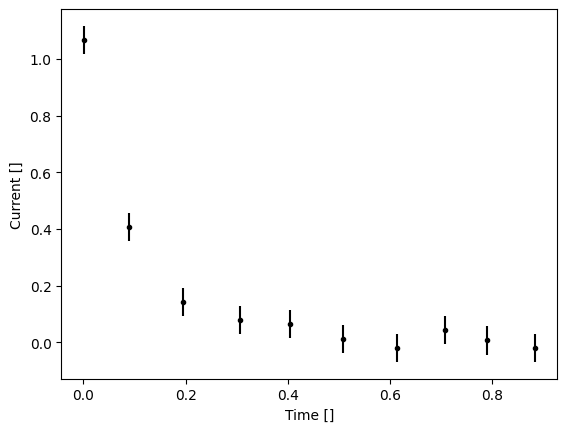

In [16]:
import matplotlib.pyplot as plt

plt.errorbar(
    data_frame['time'], 
    data_frame['current'], 
    data_frame['delta_current'], 
    ls='', 
    marker='.', 
    color='k'
)
plt.xlabel('Time []')
plt.ylabel('Current []')
plt.show()

Nun wollen wir die Messdaten mit Hilfe von `iminuit` fitten. Hierzu müssen wir zunächste zwei Module des packages importieren und eine Funktion für die Entladekurve des Kondensators definieren:

In [17]:
from iminuit import Minuit, cost
import numpy as np

def discharge_current(t, I0, R, C):
    return I0 * np.exp(-t/(R*C))

Nun können wir den fit selbst durchführen. Hierzu muss zuerst mittels dem `cost` Modul eine sogenannte Kostenfunktion erstellt werden. Die Kostenfunktion ist im Grunde unsere $\chi^2$ 

$$ \chi^2 = \sum_i =\frac{(y_i – f(x_i, \theta))^2}{\Delta y_i^2}$$

Funktion welche minimiert werden soll. Dies ist bereits bei `iminuit` für uns vordefiniert. Anschließend können wir die genutzt Kostenfunktion über `Minuit` minimieren lassen. Hierzu müssen wir zunächst geeignete Startwerte für den Minimierungsprozess vorgeben. Diese sollten im Idealfall nicht allzu weit von den wahren Werten entfernt liegen. Wir werden an einem späteren Beispiel noch einmal genauer zeigen, wie man hier vorgehen kann. Um den Minimierungsprozess zu starten muss noch am Ende `migrad()` aufgerufen werden.

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.4)      │              Nfcn = 87               │
│ EDM = 2.18e-10 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ R    │  0.03e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ C    │   3e-6    │   5e-6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                I0                 R                 C │
├────┼───────────────────────────────────────────────────────┤
│ I0 │           0.00253          -34.3309         -3.459e-9 │
│  R │          -34.3309          2.25e+09 -224.592785048e-3 │
│  C │         -3.459e-9 -224.592785048e-3          2.25e-11 │
└────┴───────────────────────────────────────────────────────┘

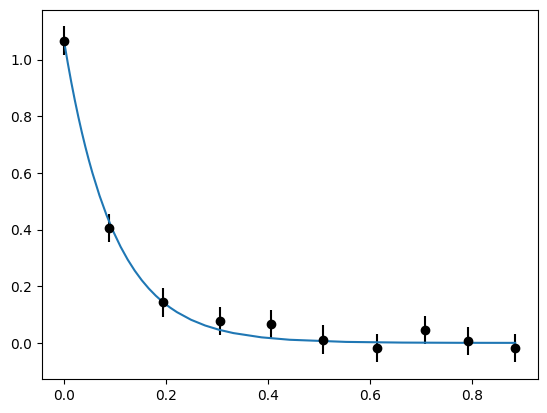

In [18]:
# Kostenfunktion:
ls = cost.LeastSquares(
    data_frame['time'],
    data_frame['current'], 
    data_frame['delta_current'], 
    discharge_current,
)

# Minimierung
mi = Minuit(ls,        # Kostenfunktion 
            I0=0.9,    # Startwerte
            R=10*10**3, 
            C=10**-6
           )
mi.migrad()

Wie ihr seht gibt euch minuit euch vier (<span style="color:red">Old iminuit version does not show plot... Check which version is used on jupyter hub.. </span>) verschiedene Objekte zurück. Für euch am wichtigsten ist die erste Tabelle, welche euch zeigt, ob euer Fit funktioniert hat. Im Allgemeinen gilt sind hier alle Felder grün hat euer Fit funktioniert, gelbe Felder können ein Problem andeuten müssen sie aber nicht und lila Felder bedeuten, dass etwas mit eurem Fit nicht in Ordnung ist. Die Bedeutungen der einzelnen Felder für unseren obigen Fit sind auch nochmal in der nachfolgenden Abbildung einzeln erklärt. Die Bedeutung der meisten Felder werden wir noch im laufe des Kurses kennen lernen. 

<figure class="image">
<img src="images/FitPerformance.png"  alt="{{Fit Performance }}" width=100%>
</figure>

Wie wir unserer Tabelle entnehmen können gibt es also ein Problem mit unserem Fit um besser verstehen zu können was das Problem sein könnte wollen wir uns auch noch die anderen Outputs angucken.

Die zweite Tabelle zeigt uns die bestimmten Werte für die Parameter in der Spalte `Value` und die deren Unsicherheiten in der Spalte `Hess error`. Hierbei fällt auf das für unseren obigen Fit die Unsicherheiten der Parameter $R$ und $C$ größer sind als die bestimmten Werte selbst. 

Die dritte Tabelle ist die sogennnante **Kovarianzmatrix**. Die Kovarianzmatrix hat als Einträge auf ihrer **Hauptdiagonalen** die **Varianzen der entsprechenden Parameter** auf der **Nebendiagonalen** stehen die **Kovarianzen**. Die Werte in Klammern gibt die **Korrelation** zwischen den entspechenden Parameters an. Sind zwei Parameter stark **korreliert** wird das entsprechende Feld **blau** dargestellt, bei einer **antikorrelation** ist das Feld **rot**. 

Die letzte Ausgabe ist ein Plot unserer Messwerte zusammen mit der Fitfunktion basierend auf den Parametern des besten Fits.

Obwohl unser Fit unsere Messdaten gut Widerspiegelt scheint es ein Problem mit der Bestimmung einiger Parameter zu geben. Die große Unsicherheit in $R$ und $C$ deutet an, dass hier das Problem liegt. Um dies zu bestätigen können wir uns einmal das reduzierte $\chi^2(x, I_0, R, C)$ als Funktion des entsprechenden Parameters von `iminuit` plotten lassen, während wir die anderen Parameter, so wie die x-Werte konstant lassen. 

Für $I_0$ sieht das entsprechende Profil so aus:

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/iminuit/minuit.py:2353: IMinuitWarning: Specified nsigma bound, but error matrix is not accurate
  warnings.warn(


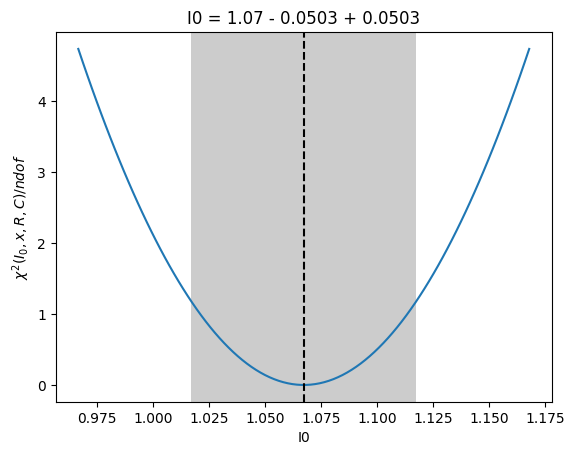

In [19]:
mi.draw_profile('I0')
plt.ylabel('$\chi^2(I_0, x, R, C)/ndof$')
plt.show()

Bei den anderen beiden Parametern ist dies nicht der Fall:

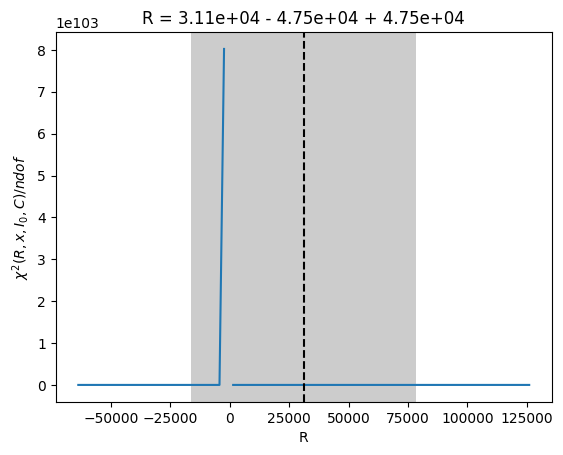

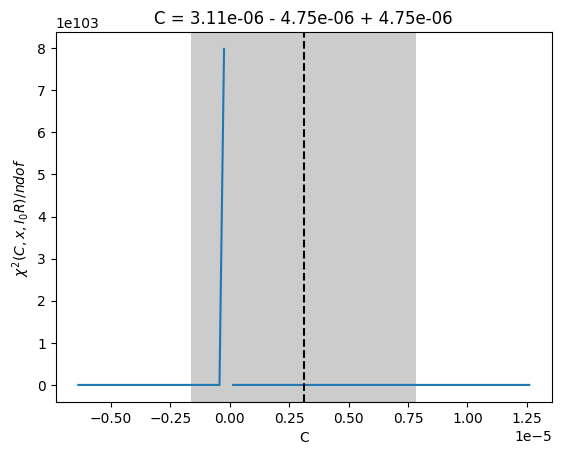

In [20]:
mi.draw_profile('R')
plt.ylabel('$\chi^2(R, x, I_0, C)/ndof$')
plt.show()

mi.draw_profile('C')
plt.ylabel('$\chi^2(C, x, I_0 R)/ndof$')
plt.show()

Das liegt daran, dass $R$ und $C$ vollständig korreliert sind. Reduziert `iminuit` $C$ um ein Faktor zwei so wird dies dadurch kompenziert, dass das optimale Minimum verlangt, dass $R$ um einen Faktor zwei größer sein muss. Sprich es ist ohne weitere Infromation nicht möglich $R$ und $C$ näher zu bestimmen lediglich das Produkt der beiden Größen.

Sprich wir müssen in unser Fitfunktion $R$ und $C$ durch die Zerfallszeit $\tau$ ersetzen und schreiben

$$ I = I_0 \exp\{-t/\tau\}$$

mit $\tau = R \cdot C$.

Fürhen wir nun erneut den Fit durch erhalten wir ein richtiges Ergebniss...

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.3)      │              Nfcn = 87               │
│ EDM = 1.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ tau  │   0.097   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │       I0      tau │
├─────┼───────────────────┤
│  I0 │  0.00254 -0.22e-3 │
│ tau │ -0.22e-3 0.000116 │
└─────┴───────────────────┘

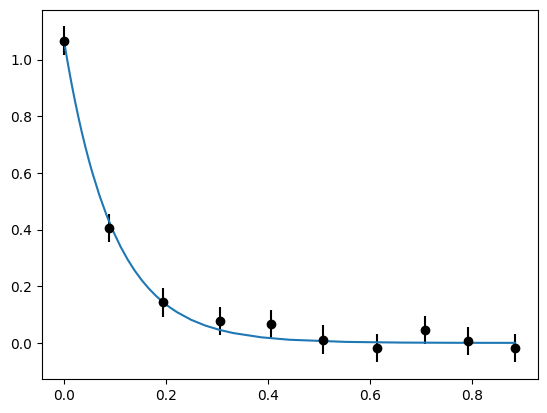

In [21]:
from iminuit import Minuit, cost

def discharge_current2(t, I0, tau):
    return I0 * np.exp(-t/tau)

ls = cost.LeastSquares(
    data_frame['time'],
    data_frame['current'], 
    data_frame['delta_current'], 
    discharge_current2
)
mi = Minuit(ls, I0=0.9, tau=0.3)
mi.migrad()

... und die Werte und Fehler lassen sich über ...

In [22]:
mi.values['I0']

1.0670397937137222

... bzw. ...

In [23]:
mi.errors['I0']

0.050402330240634355

... für jeden Parameter auslesen. Dies lässt sich nun auch nutzen, um unsere Messwerte samt Fit in einem etwas schöneren Plot mit Achsenbeschriftungen darzustellen. Hierbei können wir ausnutzen, dass `iminuit` die Parameter in der Reihenfolge der Argumente unser definierten Fitfunktion speichert.

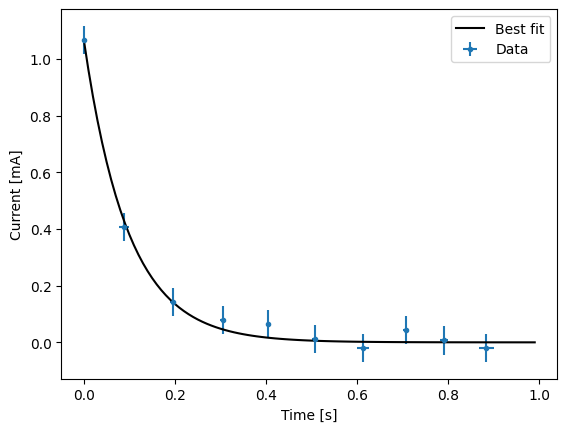

In [24]:
plt.errorbar(data_frame['time'], 
             data_frame['current'], 
             xerr=data_frame['delta_time'], 
             yerr=data_frame['delta_current'], 
             ls='', 
             marker='.',
             label='Data'
            )
x = np.arange(0, 1, 0.01)
plt.plot(x, 
         discharge_current2(x, *mi.values), # Sternchen operator zum entpacken der Werte
         color='k',
         label='Best fit'
        )
plt.legend()
plt.ylabel('Current [mA]')
plt.xlabel('Time [s]')
plt.show()

# <span style="color:red">ADD TASK HERE </span>

# Mathematisch motivierete Herleitung des $\chi^2$-Fits:

Nach diesen anfänglichen Beispielen wollen wir uns eine semi-mathematische Herleitung des $\chi^2$-Fits angucken um etwas besser zu verstehen, warum diese Methode für uns in der Physik so wichtig ist. In unserem Grundpraktikum haben wir bereits gelernt, dass Messwerte durch Zufallszahlen $x_i$ representiert werden und einer gewissen **Wahrscheinlichkeitsdichtefunktion (probability density function)** $f(x)$ unterliegen.

<figure class="image">
<img src="images/MaterialPythonkurs092018/PorbDensFun.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>


Eine **pdf** gibt an, mit welcher **Wahrscheinlichkeit ein Wert $x_i$** innerhalb eines **infinitesimalen Intervals $\text{d}x_i$** zu finden ist. Des Weitren gilt, dass die Gesamtwahrscheinlichkeit gegeben ist durch $\int_S f(x) dx = 1$. 

Nun betrachten wir folgendes Beispiel: In unserem Labor messen wir genau drei mal die Raumtemperartur T. Auch hier gilt, dass unsere Messung der einzelnen $T_i$ einer gewissen **Wahrscheinlichkeitsdichtefunktion** folgen. Betrachten Sie nun das folgende Bild; Welche **Wahrscheinlichkeitsdichtefunktion** passt besser zu den gezeigten Daten und **Warum?**

<figure class="image">
<img src="images/MaterialPythonkurs092018/ProbMaxTemp.png"  alt="{{ Beispiel PDF }}" width=100%>
</figure>

Die rechte Verteilung spiegelt unsere Messdaten besser wieder. Dies können wir auch mathematisch ausdrücken. Für $N$ voreinander unabhängige Zufallszahlen bzw. Messpunkte (in unserem Beispiel $N = 3$) ist die Gesamtwahrscheinlichkeit gegeben durch das Produkt der einzelnen Wahrscheinlichkeitsdichten $f(x_i, \theta)$ multipliziert mit dem jeweiligen infinitesimalen element $dx_i$

$$\prod_{i = 1}^{N} f(x_i,\theta) \  dx_i \text{   für alle } x_i \text{ in } [x_i, x_i + dx_i]$$

wobei $x_i$ in unserem Beispiel den Messpunkten $T_i$ und $f(x_i,\theta)$ unserer Gausverteilung mit $\theta = (\mu, \sigma)$ entspricht. Sprich sofern unsere Werte gut von der jeweiligen **Wahrscheinlichkeitsdichtefunktion** repräsentiert werden, d.h. wir die richtigen Parameter $\theta$ gewählt haben (wie im rechten oberen Plot), gilt 

$$ \prod_{i = 1}^{N} f(x_i,\theta)  dx_i \ \ \text{ist} \ \textbf{maximal.}$$

Da die einzelnen $dx_i$ von unseren Parametern $\theta$ unabhängig sind, gilt die gleiche Argumentation auch für 

$$ \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N) = \prod_{i = 1}^{N} f(x_i,\theta)$$ 

wobei $\mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)$ die sogenannte **"likelihood"** function darstellt.

Wie kommen wir nun von der **likelihood function** auf unsere **Methode der kleinsten Quadrate** und das Fitten einer Funktion $\lambda(x; \ $**$\phi$**$)$ an die gemessenen Punkte **$(x,y)$**? Dazu brauche wir noch einen Zwischenschritt. Oftmals ist es einfacher, statt die **likelihood function** zu maximieren, die so genannte **log likelihood function**

$$ \log( \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)) = \sum_{i = 1}^{N} \log(f(x_i,\theta))$$

zu maximieren. Dies ist im Grunde das Gleiche, da der Logarithmus eine monoton-steigende Funktion ist. Auch in unserem Fall der **Methode der kleinsten Quadrate** benötigen wir die **log likelihood function**. 

Stellen Sie sich nun vor, wir haben eine Messung mit $N$ voneinander unabhängigen Messpunkten (x,y). Des Weiteren nehmen wir an, dass alle $x_i$ ohne Fehler sind und dass unsere $y_i$ gaußförmig um einen unbekannten Wahrenwert $\lambda_i$ (sprich $\lambda_i$ entspricht dem Erwartungswert $\mu_i$ unserer Gaußverteilung) mit einer bekannten Varianz $\Delta y_i^2$ verteilt sind (Diese Annahme lässt sich mit dem zentralen Grenzwertsatz begründen, so lange der Fehler sich aus der Summe kleiner Fehler zusammensetzt). Die dazugehörige  **likelihood function** ist dann gegeben durch:

$$ \mathcal{L}(y_1 ... y_N; \lambda_1 ... \lambda_N, \Delta y_1 ... \Delta y_N)) = \prod_{i = 1}^{N}\frac{1}{\sqrt{2 \pi \Delta y_i^2}} \cdot \exp \bigg( \frac{ -(y_i - \lambda_i)^2}{2 \cdot \Delta y_i^2}\bigg)$$

Beziehungsweise die **log likelihood function** mit $\lambda_i = \lambda(x_i; \phi)$ ergibt sich zu

$$ \log(\mathcal{L}(y, \theta)) \approx -\frac{1}{2} \sum_{i = 1}^{N}\bigg( \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}\bigg)$$

wobei die konstanten Terme, welche nicht von unserer Funktion $\lambda(x_i; \phi)$ abhängen, vernachlässigt worden sind. Durch den Faktor $-\frac{1}{2}$ ist das Maximieren dieser **log likelihood function** gleich dem Minimieren von

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Diese Funktion ist unsere gesuchte **Methode der kleinsten Quadrate**. Mit ihrer Hilfe kann eine beliebige Funktion $\lambda(x; \phi)$, welche liniear in ihren Parametern $\phi$ ist, an unsere Messdaten $(x,y\pm\Delta y)$ gefittet werden. Dabei stellt der Fitprozess selbst lediglich ein Minimierungsproblem dar. Im Folgenden sind unsere Annahmen noch einmal grafisch in einem Beispiel dargestellt.

<figure class="image">
<img src="images/MaterialPythonkurs092018/LeastSquare.png"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>


Need to update figure above... sigma is touching best fit too often...

How does optimization work.... ? 

Use verbose mode to check steps.... 

=> Alternating specific value check if cost function minimizes.... If yes continue if not start changing other parameter:

(0.9, 10000.0, 1e-06) -> 99.20912665811522
(0.9000900000000001, 10000.0, 1e-06) -> 99.19412063461034
(0.89991, 10000.0, 1e-06) -> 99.22413838602546
(0.9002604809700815, 10000.0, 1e-06) -> 99.16571136645308
(0.8997395190299186, 10000.0, 1e-06) -> 99.25258973321158
(0.9, 10001.0, 1e-06) -> 99.2081333982375
(0.9, 9999.0, 1e-06) -> 99.21012010104333
(0.9, 10010.0, 1e-06) -> 99.19920228362008
(0.9, 9990.0, 1e-06) -> 99.21906933767059
(0.9, 10000.0, 1.0001e-06) -> 99.2081333982375
(0.9, 10000.0, 9.999e-07) -> 99.21012010104333
(0.9, 10000.0, 1.001e-06) -> 99.19920228362008
(0.9, 10000.0, 9.989999999999999e-07) -> 99.21906933767059
(1.1367992341436675, 15426.65629293471, 1.5426656292934658e-06) -> 71.48428998018905
(1.1639942960414291, 16049.877285679564, 1.6049877285679507e-06) -> 69.75101904460233
(1.308096945474447, 19352.234036123315, 1.9352234036123227e-06) -> 64.0373348681763
(1.377047580024234, 20932.354834379075, 2.093235483437897e-06) -> 65.47264288596953
(1.3083067929414927, 19352.2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.4)      │              Nfcn = 87               │
│ EDM = 2.18e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ R    │  0.03e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ C    │   3e-6    │   5e-6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                I0                 R                 C │
├────┼───────────────────────────────────────────────────────┤
│ I0 │           0.00253          -34.3309         -3.459e-9 │
│  R │          -34.3309          2.25e+09 -224.592785048e-3 │
│  C │         -3.459e-9 -224.592785048e-3          2.25e-11 │
└────┴───────────────────────────────────────────────────────┘

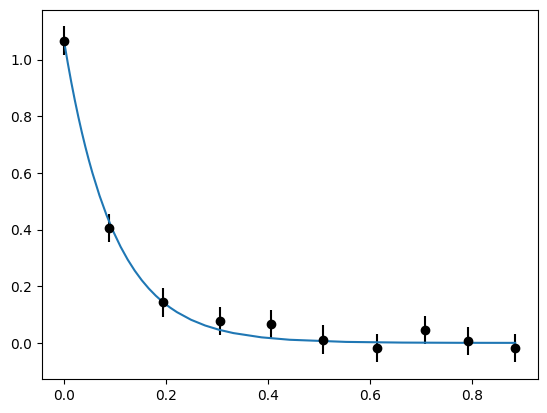

In [41]:
ls = cost.LeastSquares(data_frame['time'], data_frame['current'], data_frame['delta_current'], discharge_current, verbose=1)


mi = Minuit(ls, I0=0.9, R=10*10**3, C=10**-6)
mi.migrad()

General problem LeastSquares only accounts for uncertainty in y but not x! Needs always to be kept in mind... 

Box yellow -> Pay attention to result think about it 

Box purple -> Fit did not converege cannot be used... 


Limits can also be specified only as onsided as e.g. `(lower_boundary, None)` ...

Now more complex example to show other minuit features:

-> Counting experiment

-> Poisson statistics -> uncertainty sqrt n...

Text(0, 0.5, 'Number of counts per bin')

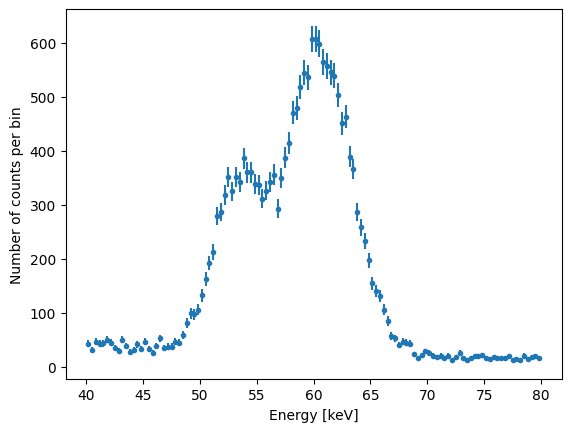

In [105]:
rnd_bkd = np.random.exponential(39.7, 5000)
rnd_bkd += 40

peak1 = np.random.normal(53.3, 2.1, 5000)
peak2 = np.random.normal(60.5, 2.78, 12000)
data = np.concatenate([rnd_bkd, peak1, peak2])

entries, edges = np.histogram(data, bins=120, range=(40, 80))
center = edges[:-1] + np.diff(edges)/2

plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

Concept entries PER BIN ! Differential plot...

-> Binnded fit problem, how to choose binning?

Zunächst wollen wir das Fitmodel in der Form

$$f(x) = A_1 \cdot \exp \bigg\{\frac{-(x - \mu_1)^2}{2 \cdot \sigma_1^2}\bigg\} + A_2 \cdot \exp \bigg\{\frac{-(x - \mu_2)^2}{2 \cdot \sigma_2^2}\bigg\} + A_3 \exp\{-x/\tau\}$$

definieren. Hier lohnt es sich erst Funktionen für die einzelnen Komponenten zu definieren und dann das Gesamtmodel. Hierdurch lassen sich später die einzelnen Komponenten besser darstellen.

In [106]:
def peak(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def bkg(x, A, tau):
    return A*np.exp(-x/tau)

def fit_model(x, A_p1, A_p2, mu_p1, mu_p2, sigma_p1, sigma_p2, A_bkg, tau_bkg):
    return peak(x, A_p1, mu_p1, sigma_p1) + peak(x, A_p2, mu_p2, sigma_p2) + bkg(x, A_bkg, tau_bkg)

Nun wollen wir wieder die Kostenfunktion und den Minimierungsfunktion definieren. Startwerte können wir anhand unseres Plots ablesen, lediglich $\tau$ lässt sich auf diese weise nicht gut bestimmen.

In [109]:
ls = cost.LeastSquares(center, entries, np.sqrt(entries), fit_model)

mi = Minuit(ls, 
            A_p1 = 400, 
            A_p2 = 700,
            mu_p1 = 54,
            mu_p2 = 60,
            sigma_p1 = 2,
            sigma_p2 = 2,
            A_bkg = 100,
            tau_bkg = 10, 
           )
mi.limits['tau_bkg'] = (0, None)

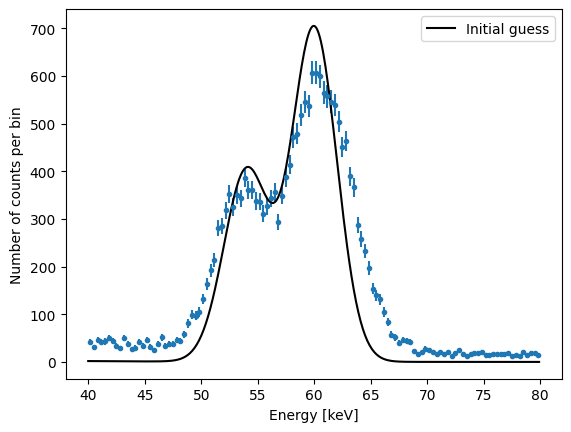

In [110]:
plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Initial guess')
plt.legend()

Unser Startparameter sind bereits nicht schlecht, aber weichen noch stark von den Daten ab. Bei komplexeren Daten und Fitmodellen lohnt es sich den fit schrittweise durchzuführen. Bevor wir uns den beiden Peaks widmen, welche uns eigentlich interessieren, sollten wir Versuchen den Untergrund etwas besser zu beschreiben. Um den Untergrund besser fitten zu können sollten wir erst den Fitbereich auf einen Energiebereich limitieren, in welchem der Untergrund dominiert. Dem Plot können wir entnehmen, dass dies für alle Werte unterhalb von 45 keV und oberhalb von 70 keV der Fall ist. Im allgemeinen können wir Wertebereiche in python mit Hilfe von „Masken“ selektieren. Eine Maske lässt sich wie folg erstellen:

In [111]:
mask_outside_of_peaks = (center < 45) | (center >= 70)

Die Maske hat hierbei die Selbe länge wie unseren Daten…

In [112]:
len(mask_outside_of_peaks), len(mask_outside_of_peaks)

(120, 120)

… und beinhaltet Wahrheitswerte True und False, bzw. 1 und 0 mit welchen wir unsere Daten wie folgt selektieren können:

In [113]:
mask_outside_of_peaks, center[mask_outside_of_peaks]

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([40.16666667, 40.5       , 40.83333333,

Wir können auch verschieden Masken mit Hilfe von Wahrheitsoperatoren kombinieren

TODO add operators and examples +/*

    
Unsere Selektion können wir an unsere Kostenfunktion direkt übergeben. Außerdem müssen wir noch alle Fitparameter festhalten, welche nicht zum Untergrund beitragen. 

In [114]:
ls.mask = (center < 45) | (center >= 70)
mi.fixed[:] = True

Nun können wir nochmal unsere Funktion und Messwerte für den ausgewählten Bereich plotten…

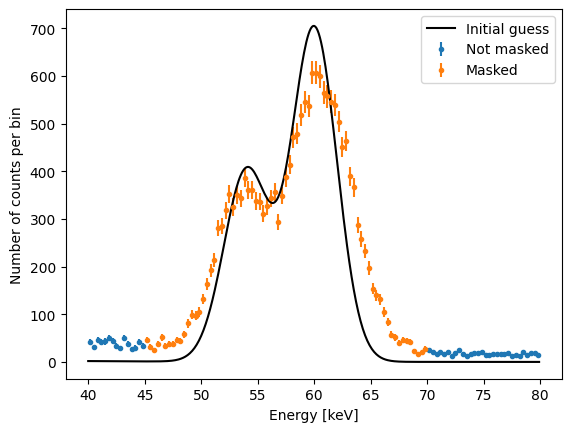

In [115]:
plt.errorbar(center[ls.mask], entries[ls.mask], np.sqrt(entries[ls.mask]), ls='', marker='.', label='Not masked')
plt.errorbar(center[~ls.mask], entries[~ls.mask], np.sqrt(entries[~ls.mask]), ls='', marker='.', label='Masked')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Initial guess')
plt.legend()

… bevor wir die Minmierung starten, und das Resultat darstellen.

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.17 (χ²/ndof = 0.8)      │              Nfcn = 77               │
│ EDM = 4.56e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    400    │     4     │            │            │         │         │  yes  │
│ 1 │ A_p2     │    700    │     7     │            │            │         │         │  yes  │
│ 2 │ mu_p1    │   54.0    │    0.5    │            │            │         │         │  yes  │
│ 3 │ mu_p2    │   60.0    │    0.6    │            │            │         │         │  yes  │
│ 4 │ sigma_p1 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 5 │ sigma_p2 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 6 │ A_bkg    │    108    │    12     │            │            │         │         │       │
│ 7 │ tau_bkg  │   39.9    │    3.0    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │        0        0        0        0        0        0        0        0 │
│     A_p2 │        0        0        0        0        0        0        0        0 │
│    mu_p1 │        0        0        0        0        0        0        0        0 │
│    mu_p2 │        0        0        0        0        0        0        0        0 │
│ sigma_p1 │        0        0        0        0        0        0        0        0 │
│ sigma_p2 │        0        0        0        0        0        0        0        0 │
│    A_bkg │        0        0        0        0        0        0      152      -36 │
│  tau_bkg │        0        0        0        0        0        0      -36     9.16 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

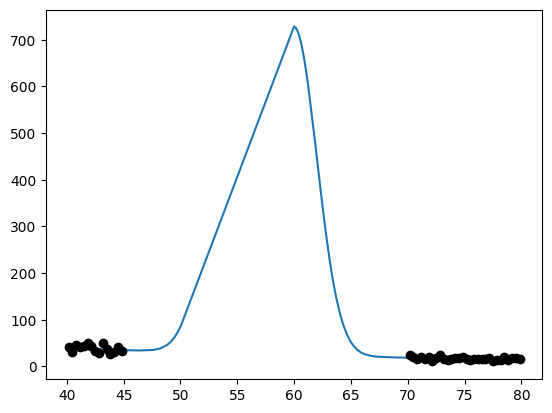

In [119]:
mi.fixed[['tau_bkg', 'A_bkg']] = False
mi

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.17 (χ²/ndof = 0.8)      │              Nfcn = 91               │
│ EDM = 2.29e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    400    │     4     │            │            │         │         │  yes  │
│ 1 │ A_p2     │    700    │     7     │            │            │         │         │  yes  │
│ 2 │ mu_p1    │   54.0    │    0.5    │            │            │         │         │  yes  │
│ 3 │ mu_p2    │   60.0    │    0.6    │            │            │         │         │  yes  │
│ 4 │ sigma_p1 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 5 │ sigma_p2 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 6 │ A_bkg    │    108    │    12     │            │            │         │         │       │
│ 7 │ tau_bkg  │   39.9    │    3.0    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │        0        0        0        0        0        0        0        0 │
│     A_p2 │        0        0        0        0        0        0        0        0 │
│    mu_p1 │        0        0        0        0        0        0        0        0 │
│    mu_p2 │        0        0        0        0        0        0        0        0 │
│ sigma_p1 │        0        0        0        0        0        0        0        0 │
│ sigma_p2 │        0        0        0        0        0        0        0        0 │
│    A_bkg │        0        0        0        0        0        0      152      -36 │
│  tau_bkg │        0        0        0        0        0        0      -36     9.15 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

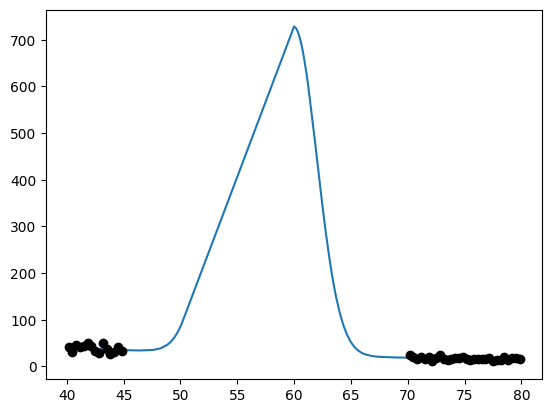

In [120]:
mi.migrad()

Now next step first peak...

In [121]:
plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Initial guess')
plt.legend()


Das Resultat sieht bereits sehr gut aus. Nun können wir uns den eigentlichen Peaks widmen und starten im folgenden mit dem kleineren der Beiden. Zunächst sollten wir den maskierten Bereich entweder neu definieren oder komplett entfernen. 

In [122]:
ls.mask = None

Außerdem können wir dem Plot entnehmen, dass durch den höheren Unterrund unsere Anfangsstartwerte nicht mehr ganz so gut passen diese können wir wie folgt aktualisieren:

In [123]:
mi.values['A_p1'] = 700
mi.values['sigma_p1'] = 3

Nun sollten wir alle Parameter wieder festhalten und nur die Parameter des ersten Peaks freigeben.

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1416 (χ²/ndof = 12.1)      │              Nfcn = 169              │
│ EDM = 3.27e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    345    │     6     │            │            │         │         │       │
│ 1 │ A_p2     │    700    │     7     │            │            │         │         │  yes  │
│ 2 │ mu_p1    │   53.47   │   0.04    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.0    │    0.6    │            │            │         │         │  yes  │
│ 4 │ sigma_p1 │   2.138   │   0.034   │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.00    │   0.02    │            │            │         │         │  yes  │
│ 6 │ A_bkg    │    108    │    12     │            │            │         │         │  yes  │
│ 7 │ tau_bkg  │   39.9    │    3.0    │            │            │    0    │         │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │       40        0   0.0064        0  -0.1170        0        0        0 │
│     A_p2 │        0        0   0.0000        0   0.0000        0        0        0 │
│    mu_p1 │   0.0064   0.0000  0.00171   0.0000   0.0003   0.0000   0.0000   0.0000 │
│    mu_p2 │        0        0   0.0000        0   0.0000        0        0        0 │
│ sigma_p1 │  -0.1170   0.0000   0.0003   0.0000  0.00116   0.0000   0.0000   0.0000 │
│ sigma_p2 │        0        0   0.0000        0   0.0000        0        0        0 │
│    A_bkg │        0        0   0.0000        0   0.0000        0        0        0 │
│  tau_bkg │        0        0   0.0000        0   0.0000        0        0        0 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

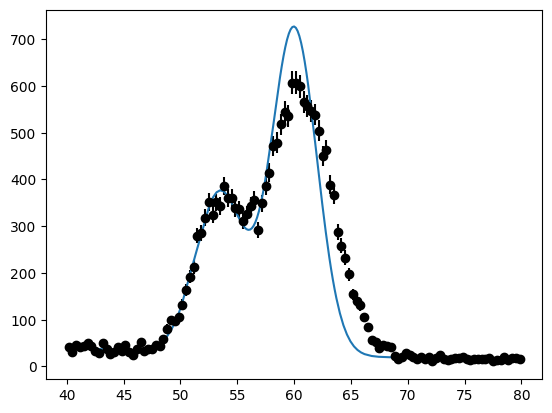

In [124]:
mi.fixed[:] = True
mi.fixed[['A_p1', 'mu_p1', 'sigma_p1']] = False
mi.migrad()

Jetzt wiederholen wir das ganze für den zweiten Peak…

In [125]:
mi.fixed[:] = True
mi.fixed[['A_p2', 'mu_p2', 'sigma_p2']] = False
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 133.6 (χ²/ndof = 1.1)      │              Nfcn = 232              │
│ EDM = 3.64e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    345    │     6     │            │            │         │         │  yes  │
│ 1 │ A_p2     │    572    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.47   │   0.04    │            │            │         │         │  yes  │
│ 3 │ mu_p2    │  60.652   │   0.032   │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.138   │   0.034   │            │            │         │         │  yes  │
│ 5 │ sigma_p2 │   2.710   │   0.027   │            │            │         │         │       │
│ 6 │ A_bkg    │    108    │    12     │            │            │         │         │  yes  │
│ 7 │ tau_bkg  │   39.9    │    3.0    │            │            │    0    │         │  yes  │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────────────┐
│          │      A_p1      A_p2     mu_p1     mu_p2  sigma_p1  sigma_p2     A_bkg   tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────────────┤
│     A_p1 │         0         0         0     0.000         0         0         0         0 │
│     A_p2 │         0        50         0    0.0065         0 -112.0e-3         0         0 │
│    mu_p1 │         0         0         0     0.000         0         0         0         0 │
│    mu_p2 │     0.000    0.0065     0.000   0.00103     0.000   -0.2e-3     0.000     0.000 │
│ sigma_p1 │         0         0         0     0.000         0         0         0         0 │
│ sigma_p2 │         0 -112.0e-3         0   -0.2e-3         0   0.00073         0         0 │
│    A_bkg │         0         0         0     0.000         0         0         0         0 │
│  tau_bkg │         0         0         0     0.000         0         0         0         0 │
└──────────┴─────────────────────────────────────────────────────────────────────────────────┘

Bevor wir ein letztes mal wieder alle Parameter freigeben und einen letzten fit durchführen. 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 110.2 (χ²/ndof = 1.0)      │              Nfcn = 490              │
│ EDM = 7.62e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    314    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    568    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.27   │   0.08    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.53   │   0.06    │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.13    │   0.06    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.81    │   0.04    │            │            │         │         │       │
│ 6 │ A_bkg    │    109    │    12     │            │            │         │         │       │
│ 7 │ tau_bkg  │   39.7    │    2.8    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │     48.4       10    0.138   0.1230  -0.0575  -0.1117       -0        1 │
│     A_p2 │       10     49.5    0.001   0.0227  -0.0262  -0.1235       -0        0 │
│    mu_p1 │    0.138    0.001  0.00612   0.0033   0.0031  -0.0023   -0.057    0.018 │
│    mu_p2 │   0.1230   0.0227   0.0033  0.00313   0.0021  -0.0017  -0.0529   0.0118 │
│ sigma_p1 │  -0.0575  -0.0262   0.0031   0.0021  0.00331  -0.0013  -0.1336   0.0273 │
│ sigma_p2 │  -0.1117  -0.1235  -0.0023  -0.0017  -0.0013  0.00186   0.0695  -0.0218 │
│    A_bkg │       -0       -0   -0.057  -0.0529  -0.1336   0.0695      131      -32 │
│  tau_bkg │        1        0    0.018   0.0118   0.0273  -0.0218      -32     8.11 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

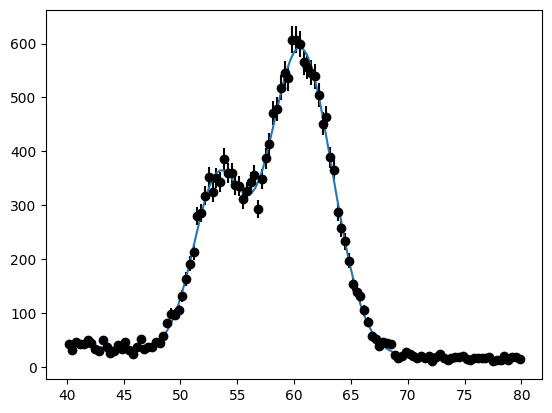

In [126]:
mi.fixed[:] = False
mi.migrad()

TODO: Add indivdiual components to the plot...

In [127]:
plt.errorbar(center, entries, np.sqrt(entries), ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Number of counts per bin')

x = np.arange(40, 80, 0.1)
plt.plot(x, fit_model(x, *mi.values), color='k', label='Best fit')
plt.plot(x, peak(x, *mi.values['A_p1', 'mu_p1', 'sigma_p1']), color='gray', ls='--')
plt.plot(x, peak(x, *mi.values['A_p2', 'mu_p2', 'sigma_p2']), color='gray', ls='-.')
plt.plot(x, bkg(x, *mi.values['A_bkg', 'tau_bkg']), color='gray')
plt.legend()


Das Ergebnis sieht sehr gut aus. Alle Kacheln sind grün und die Daten scheinen durch die Funktion gut beschrieben zu werden. Natürlich können wir auch das Gesamte Fitverfahren etwas kompakter in einer Zelle darstellen:

In [128]:
ls = cost.LeastSquares(center, entries, np.sqrt(entries), fit_model)

mi = Minuit(ls, 
            A_p1 = 800, 
            A_p2 = 1400,
            mu_p1 = 54,
            mu_p2 = 60,
            sigma_p1 = 2,
            sigma_p2 = 2,
            A_bkg = 100,
            tau_bkg = 10, 
           )
mi.limits['tau_bkg'] = (0, None)
mi.fixed[:] = True
ls.mask = (center < 45) | (center >= 70)
mi.fixed[['tau_bkg', 'A_bkg']] = False
mi.migrad()
ls.mask = None
mi.values['A_p1'] = 700
mi.values['sigma_p1'] = 3
mi.fixed[:] = True
mi.fixed[['A_p1', 'mu_p1', 'sigma_p1']] = False
mi.migrad()
mi.fixed[:] = True
mi.fixed[['A_p2', 'mu_p2', 'sigma_p2']] = False
mi.migrad()
mi.fixed[:] = False
mi.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 110.2 (χ²/ndof = 1.0)      │              Nfcn = 536              │
│ EDM = 3.81e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    314    │     7     │            │            │         │         │       │
│ 1 │ A_p2     │    568    │     7     │            │            │         │         │       │
│ 2 │ mu_p1    │   53.27   │   0.08    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.53   │   0.06    │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.13    │   0.06    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.81    │   0.04    │            │            │         │         │       │
│ 6 │ A_bkg    │    109    │    12     │            │            │         │         │       │
│ 7 │ tau_bkg  │   39.7    │    2.8    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │     48.4       10    0.138   0.1230  -0.0575  -0.1117       -0        1 │
│     A_p2 │       10     49.5    0.001   0.0227  -0.0262  -0.1235       -0        0 │
│    mu_p1 │    0.138    0.001  0.00611   0.0033   0.0031  -0.0023   -0.057    0.018 │
│    mu_p2 │   0.1230   0.0227   0.0033  0.00313   0.0021  -0.0017  -0.0529   0.0118 │
│ sigma_p1 │  -0.0575  -0.0262   0.0031   0.0021  0.00331  -0.0013  -0.1338   0.0273 │
│ sigma_p2 │  -0.1117  -0.1235  -0.0023  -0.0017  -0.0013  0.00186   0.0696  -0.0218 │
│    A_bkg │       -0       -0   -0.057  -0.0529  -0.1338   0.0696      131      -32 │
│  tau_bkg │        1        0    0.018   0.0118   0.0273  -0.0218      -32     8.12 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

### Add task here

 # Wann fittet ein Fit?
Nach dem wir nun unser Model an unsere Daten angepasst haben stellt sich die Frage: „Spiegelt unser Model unsere Daten gut wider?“.  Um diese Frage beantworten zu könne gibt es verschiedene Möglichkeiten, welche wir uns im Folgenden etwas näher angucken wollen. 
## Fit Residuan: 
Schauen wir uns zunächst noch einmal an, wie das Chi-Quadrat definiert ist:
$$$$
Wir minimieren den Abstand zwischen einem Messwert und unserer Model und Gewichten diesen mit den Unsicherheiten unserer Messwerte. Fitresiduan spiegeln genau dies wider. Sie sind definiert als 
$$$$
Für unseren Fit sehen sie wie folgt aus. 


In [129]:
residuals = (entries - fit_model(center, *mi.values))/np.sqrt(entries)

plt.plot(center, residuals, ls='', marker='.')
plt.xlabel('Energy [keV]')
plt.ylabel('Residuals [$\sigma$]')

Text(0, 0.5, 'Residuals [$\\sigma$]')

Als einzelner Plot sind sie noch nicht sehr informative. Hilfreicher ist es bereits sofern wir die Residuanen zusammen mit unseren Daten und Fitmodel darstellen. 

/tmp/jobs/29593351/ipykernel_11778/53208542.py:7: UserWarning: The figure layout has changed to tight
  fig_fit.tight_layout()


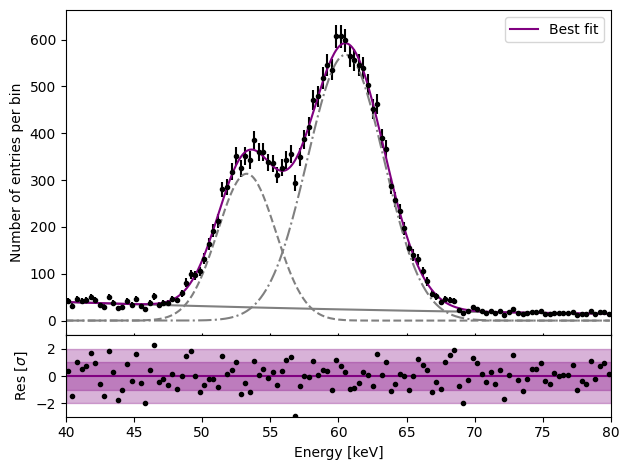

In [130]:
fig_fit = plt.figure(constrained_layout=True)
gs = fig_fit.add_gridspec(5, 5, hspace=0)


main_axis = fig_fit.add_subplot(gs[:4, :])
res_axis = fig_fit.add_subplot(gs[4:, :], sharex=main_axis)
fig_fit.tight_layout()


main_axis.errorbar(center, entries, np.sqrt(entries), ls='', marker='.', color='k')

main_axis.plot(x, peak(x, *mi.values['A_p1', 'mu_p1', 'sigma_p1']), color='gray', ls='--')
main_axis.plot(x, peak(x, *mi.values['A_p2', 'mu_p2', 'sigma_p2']), color='gray', ls='-.')
main_axis.plot(x, bkg(x, *mi.values['A_bkg', 'tau_bkg']), color='gray')

x = np.arange(40, 80, 0.1)
main_axis.plot(x, fit_model(x, *mi.values), color='purple', label='Best fit')
main_axis.legend()
main_axis.set_ylabel('Number of entries per bin')
main_axis.xaxis.set_tick_params(direction='inout')
main_axis.tick_params(axis='x', labelcolor=(0, 0, 0, 0))
main_axis.set_xlim(40, 80)

res_axis.set_xlabel('Energy [keV]')
res_axis.set_ylabel('Res [$\sigma$]')
res_axis.set_ylim(-3, 3)
res_axis.set_yticks([-2, 0,  2])
res_axis.fill_between((40, 80), -1, 1, alpha=0.3, color='purple')
res_axis.fill_between((40, 80), -2, 2, alpha=0.3, color='purple')
res_axis.axhline(0, color='purple')
res_axis.set_xlim(40, 80)
res_axis.plot(center, 
              residuals,
              color='k', marker='.', ls=''
             )
plt.tight_layout()

Sofern wir einen unser Fitmodel unsere Daten gut widerspiegelt erwarten wir, dass die Residuen sich Gaußförmig zufällig um den Wert 0 herum verteilen. Dies folgt direkt aus der Annahme, dass de Unsicherheiten unserer Messwerte sich durch eine Gaußverteilung darstellen lassen. Dies können wir direkt überprüfen, sofern wir unsere Residuen in ein Histogramm eintragen. 

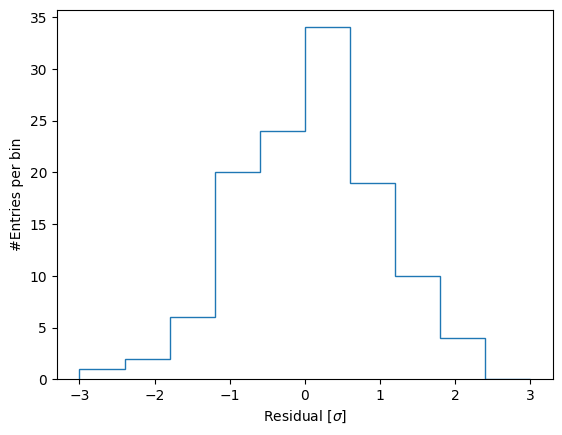

In [136]:
plt.hist(residuals, bins=10, range=(-3, 3), histtype='step')
plt.xlabel('Residual [$\sigma$]')
plt.ylabel('#Entries per bin')
plt.show()

Bzw. den Anteil an Residuen berechnen welcher innerhalb der 1 $\sigma$ Umgebeung

In [138]:
np.sum(np.abs(residuals) < 1)/len(residuals)

0.675

Zeigen unsere Residuen eine Struktur oder ein systematisches Verhalten deutet dies auf einen ungenauen Fit oder ein falsches Fitmodel hin. Dies ist im folgenden gezeigt. 

/tmp/jobs/29593351/ipykernel_11778/4141622746.py:10: UserWarning: The figure layout has changed to tight
  fig_fit.tight_layout()


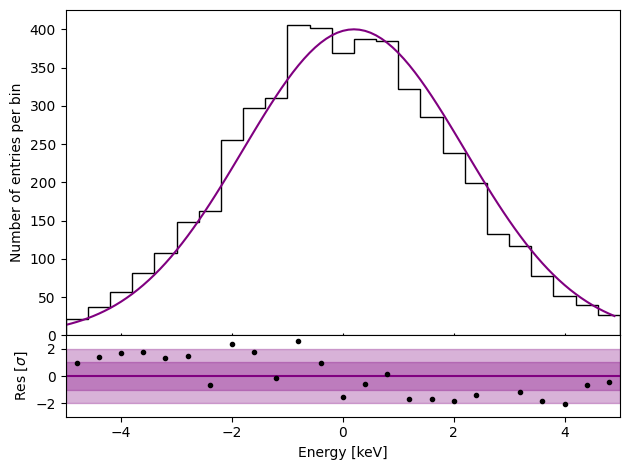

In [54]:
pseudo_data = np.random.normal(0, 2, 5000)


fig_fit = plt.figure(constrained_layout=True)
gs = fig_fit.add_gridspec(5, 5, hspace=0)


main_axis = fig_fit.add_subplot(gs[:4, :])
res_axis = fig_fit.add_subplot(gs[4:, :], sharex=main_axis)
fig_fit.tight_layout()


entries1, edges1, _ = main_axis.hist(pseudo_data, bins=25, range=(-5,5), histtype='step', color='k')
center1 = edges1[:-1] + np.diff(edges1)/2

residuals1 = (entries1 - peak(center1, 400, 0.2, 2))/np.sqrt(entries1)

x = np.arange(-5, 5, 0.1)

main_axis.plot(x, peak(x, 400, 0.2, 2), color='purple')
main_axis.set_ylabel('Number of entries per bin')
main_axis.xaxis.set_tick_params(direction='inout')
main_axis.tick_params(axis='x', labelcolor=(0, 0, 0, 0))
main_axis.set_xlim(-5, 5)

res_axis.set_xlabel('Energy [keV]')
res_axis.set_ylabel('Res [$\sigma$]')
res_axis.set_ylim(-3, 3)
res_axis.set_yticks([-2, 0,  2])
res_axis.fill_between((-5, 5), -1, 1, alpha=0.3, color='purple')
res_axis.fill_between((-5, 5), -2, 2, alpha=0.3, color='purple')
res_axis.axhline(0, color='purple')
res_axis.set_xlim(-5, 5)
res_axis.plot(center1, 
              residuals1,
              color='k', marker='.', ls=''
             )
plt.tight_layout()

Zusätzlich zu den Fit Residuan bietet das $\chi^2$ selbst einen Weg um die „goodness-of-fit“ unseres Model bestimmen zu können...

### Chi-Square:

Need to update the following:...


Wie Sie sehen können, ist der Wert für den Widerstand zwar gleich geblieben, jedoch die Unsicherheit des Wertes hat sich erhöht.

Wie gut fittet unsere obige Funktion unsere Messdaten? Sehr gut? Gut? Befriedigend? Oder doch eher schlecht?   Wäre es nicht gut, ein Maß für die Güte des Fits zu haben? Wie könnte ein solches Maß aussehen?

Sie haben das entscheidende Kriterium bereits kennengelernt, bei der Methode der kleinsten Quadrate geht es darum, das  $\chi^2$ zu minimieren. Gucken wir uns hierzu erst noch einmal an, wie sich das $\chi^2$ berechnet:

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$


Coming back to figure

<figure class="image">
<img src="images/MaterialPythonkurs092018/LeastSquare.png"  alt="{{ Least Square Beispiel }}" width=80%>
</figure>

Chi-Square can be understood easily, want to minimize distance, put bigger emphsis on values with smaller uncertainty as more confident...



Wie Sie sehen können, ist das $\chi^2$ für unsere zweite Funktion etwas größer als für das klassische ohm'sche Gesetzt. Somit würden wir unseren zweiten Ansatz verwerfen.

Damit man für einen gegebenen Datensatz nicht hunderte von verschiedenen Funktionen durchprobieren muss, gibt es für das $\chi^2$ eine allgemeine Faustregel, welche den berechneten $\chi^2$-Wert mit der Anzahl unserer Freiheitsgrade vergleicht. Die Anzahl an Freiheitsgrade ist allgemeinhin gegeben als *Anzahl der Messwerte - Anzahl der Funktionsparameter* ($m - n$).

1. Sofern  $\chi^2/\text{ndof} >> 1$: sollte die Hypothese bzw. die Fitfunktion angezweifelt werden. Sie beschreibt in diesem Fall die Messdaten nur unzureichend. (Bzw. sollte $\chi^2/\text{ndof} > 1$ kann dies auch bedeuten, dass die Unsicherheiten unterschätzt sind)
2. Sofern $\chi^2/\text{ndof} \approx 1$: beschreibt die Hypothese bzw. die Fitfunktion die Daten wie erwartet und wird nicht abgelehnt. 
3. Falls $\chi^2/\text{ndof} << 1$ beschreibt die Hypothese bzw. die Fitfunktion die Daten wesentlich besser als erwartet. In diesem Fall heißt es nicht, dass unsere Hypothese falsch ist, aber man sollte überprüfen, ob die gemessenen Fehler nicht überschätzt worden sind (oder eine Korrelation zwischen den Messfehlern vorliegt).  

Sofern Sie eine Arbeit schreiben und Ihre **Goodness-of-the-Fit** ($\chi^2/\text{ndof}$) angeben wollen, so geben Sie immer beides an, das $\chi^2$ und die Anzahl an Freiheitsgraden ndof. Beide Werte getrennt haben einen größeren Informationsgehalt als der resultierende Quotient (Genaueres lernen Sie z.B. in der Vorlesung *Statistik, Datenanalyse und Simulationen* im Master).

Sehen wir uns hierzu nochmal unseren Doppelpeakfit etwas genauer an. Iminuit berechnet hier für uns bereits das reuzierete $\chi^2$.

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 71.34 (χ²/ndof = 1.4)      │              Nfcn = 517              │
│ EDM = 1.63e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    627    │    14     │            │            │         │         │       │
│ 1 │ A_p2     │  1.142e3  │  0.014e3  │            │            │         │         │       │
│ 2 │ mu_p1    │   53.38   │   0.09    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.50   │   0.06    │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.18    │   0.06    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.76    │   0.04    │            │            │         │         │       │
│ 6 │ A_bkg    │    222    │    23     │            │            │         │         │       │
│ 7 │ tau_bkg  │   40.1    │    2.9    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2    A_bkg  tau_bkg │
├──────────┼─────────────────────────────────────────────────────────────────────────┤
│     A_p1 │      196   0.03e3    0.333    0.292   -0.081  -0.2462  -0.01e3        2 │
│     A_p2 │   0.03e3      202   -0.064    0.010   -0.100  -0.2153       -0        0 │
│    mu_p1 │    0.333   -0.064  0.00757    0.004    0.004  -0.0028   -0.161    0.023 │
│    mu_p2 │    0.292    0.010    0.004  0.00367    0.003  -0.0020   -0.135    0.015 │
│ sigma_p1 │   -0.081   -0.100    0.004    0.003  0.00396  -0.0016   -0.302    0.031 │
│ sigma_p2 │  -0.2462  -0.2153  -0.0028  -0.0020  -0.0016  0.00196   0.1500  -0.0229 │
│    A_bkg │  -0.01e3       -0   -0.161   -0.135   -0.302   0.1500      530      -64 │
│  tau_bkg │        2        0    0.023    0.015    0.031  -0.0229      -64     8.17 │
└──────────┴─────────────────────────────────────────────────────────────────────────┘

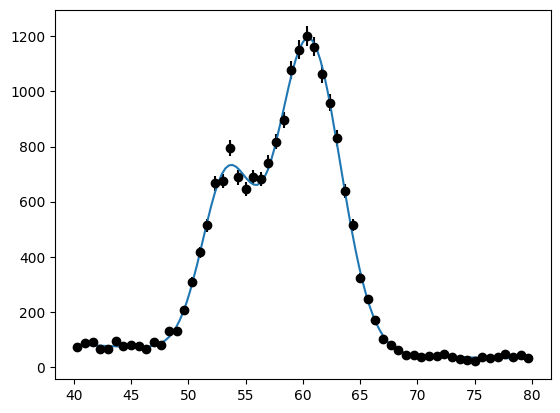

In [55]:
mi

Estimate ourselves:

In [56]:
def chi_squre_ndof(x_values, y_values, dy_values, fit_model, minuit):
    ndof = len(x_values) - len(minuit.values)
    chi = np.sum((y_values - fit_model(x_values, *minuit.values))**2/dy_values**2)
    return chi, ndof


chi_squre, ndof = chi_squre_ndof(center, entries, np.sqrt(entries), fit_model, mi)
print(chi_squre, ndof, chi_squre/ndof)

71.34036100527231 52 1.37193001933216


### Chi-Squre hypothesis testing...

In [57]:
from scipy.stats import chi2
chi_distribution = lambda x, ndof: chi2.pdf(x, ndof)

Text(0, 0.5, '$\\chi^2(x)$')

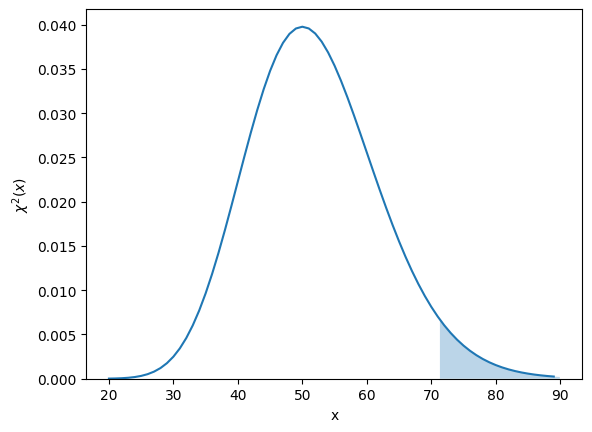

In [58]:
x = np.arange(20, 90)
plt.plot(x, chi_distribution(x, 52))

x = np.arange(chi_squre, 90, 0.1)
plt.fill_between(x, chi_distribution(x, 52), alpha=0.3)
plt.ylim(0, None)
plt.xlabel('x')
plt.ylabel('$\chi^2(x)$')

Explain p-value....

In [59]:
p_value = lambda x, ndof: 1 - chi2.cdf(x, ndof)
p_value(chi_squre, ndof), p_value(chi_squre*10, ndof*10)

(0.038725580428877526, 3.286394945067883e-08)

Try alternative fit model

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 247.8 (χ²/ndof = 4.7)      │              Nfcn = 296              │
│ EDM = 5.03e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A_p1     │    635    │    14     │            │            │         │         │       │
│ 1 │ A_p2     │  1.140e3  │  0.015e3  │            │            │         │         │       │
│ 2 │ mu_p1    │   53.5    │    0.1    │            │            │         │         │       │
│ 3 │ mu_p2    │   60.61   │   0.07    │            │            │         │         │       │
│ 4 │ sigma_p1 │   2.42    │   0.08    │            │            │         │         │       │
│ 5 │ sigma_p2 │   2.68    │   0.05    │            │            │         │         │       │
│ 6 │ c        │   43.8    │    1.3    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬────────────────────────────────────────────────────────────────┐
│          │     A_p1     A_p2    mu_p1    mu_p2 sigma_p1 sigma_p2        c │
├──────────┼────────────────────────────────────────────────────────────────┤
│     A_p1 │      182   0.02e3    0.357    0.290   -0.095  -0.2364      0.2 │
│     A_p2 │   0.02e3      217   -0.324   -0.151   -0.304  -0.1248      0.2 │
│    mu_p1 │    0.357   -0.324   0.0105    0.006    0.006  -0.0035    0.002 │
│    mu_p2 │    0.290   -0.151    0.006  0.00446    0.004  -0.0023   -0.005 │
│ sigma_p1 │   -0.095   -0.304    0.006    0.004  0.00569  -0.0021   -0.013 │
│ sigma_p2 │  -0.2364  -0.1248  -0.0035  -0.0023  -0.0021  0.00204  -0.0064 │
│        c │      0.2      0.2    0.002   -0.005   -0.013  -0.0064     1.62 │
└──────────┴────────────────────────────────────────────────────────────────┘

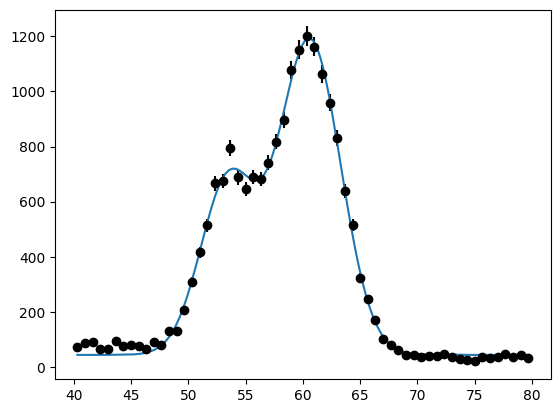

In [60]:
def alternative_fit_model(x, A_p1, A_p2, mu_p1, mu_p2, sigma_p1, sigma_p2, c):
    return peak(x, A_p1, mu_p1, sigma_p1) + peak(x, A_p2, mu_p2, sigma_p2) + c

ls = cost.LeastSquares(center, entries, np.sqrt(entries), alternative_fit_model)

mi = Minuit(ls, 
            A_p1 = 800, 
            A_p2 = 1400,
            mu_p1 = 54,
            mu_p2 = 60,
            sigma_p1 = 2,
            sigma_p2 = 2,
            c = 100, 
           )
mi.limits['c'] = (0, None)
mi.fixed[:] = True
ls.mask = (center < 45) | (center >= 70)
mi.fixed[['c']] = False
mi.migrad()
ls.mask = None
mi.values['A_p1'] = 700
mi.values['sigma_p1'] = 3
mi.fixed[:] = True
mi.fixed[['A_p1', 'mu_p1', 'sigma_p1']] = False
mi.migrad()
mi.fixed[:] = True
mi.fixed[['A_p2', 'mu_p2', 'sigma_p2']] = False
mi.migrad()
mi.fixed[:] = False
mi.migrad()

In [61]:
chi_squre, ndof = chi_squre_ndof(center, entries, np.sqrt(entries), alternative_fit_model, mi)
print(chi_squre, ndof, chi_squre/ndof)

247.75609338750667 53 4.67464327146239


Fit obviusly worse...

But is p-value of 0.4 better than 0.2? No ! Hypothesis test -> need to decide on threshold before...

When do assumptions break? 

E.g. low stats. 

Should we add ML and unbinned fits here? Maybe as outlook as otherwise too much?

In [62]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

In [63]:
from tqdm.notebook import tqdm

res_good_model = []
res_overfitting = []
res_wrong_model = []

def peak(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)


for i in tqdm(range(5000)):
    
    test_data = np.random.normal(0, 2, 5000)
    
    entries, edges = np.histogram(test_data, bins=25, range=(-4,4))
    center = edges[:-1] + np.diff(edges)/2
    
    ls = cost.LeastSquares(center, entries, np.sqrt(entries), peak)
    mi = Minuit(ls, 
                mu=0.1,
                sigma=1.5,
                A = 300
               )
    mi.migrad()
    
    chi, ndof = chi_squre_ndof(center, entries, np.sqrt(entries), peak, mi)
    res_good_model.append(p_value(chi, ndof))


    ls = cost.LeastSquares(center, entries, np.sqrt(entries)*1.1, peak)
    mi = Minuit(ls, 
                mu=0.1,
                sigma=1.5,
                A = 300
               )
    mi.migrad()
    
    chi, ndof = chi_squre_ndof(center, entries, np.sqrt(entries)*1.1, peak, mi)
    res_overfitting.append(p_value(chi, ndof))


    ls = cost.LeastSquares(center, entries, np.sqrt(entries), lorentzian)
    mi = Minuit(ls, 
                x0=0,
                gam=3,
                a = 300,
               )
    mi.migrad()
    
    chi, ndof = chi_squre_ndof(center, entries, np.sqrt(entries), lorentzian, mi)
    res_wrong_model.append(p_value(chi, ndof))

res_wrong_model = np.array(res_wrong_model)
res_good_model = np.array(res_good_model)

  0%|          | 0/5000 [00:00<?, ?it/s]

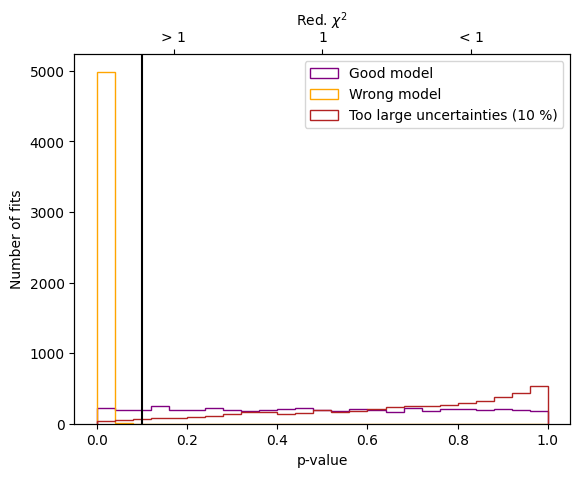

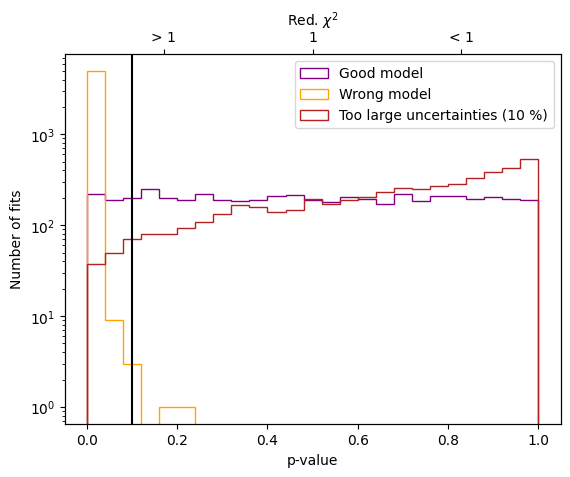

In [64]:
fig, axes = plt.subplots()
axes.hist(res_good_model, bins=25, range=(0, 1), histtype='step', color='purple', label='Good model')
axes.hist(res_wrong_model, bins=25, range=(0, 1), histtype='step', color='orange', label='Wrong model')
axes.hist(res_overfitting, bins=25, range=(0, 1), histtype='step', color='firebrick', label='Too large uncertainties (10 %)')
axes.set_xlabel('p-value')
axes.set_ylabel('Number of fits')
axes.legend()
axes.axvline(0.1, color='k')
axes2 = plt.twiny()
axes2.set_xlabel('Red. $\chi^2$')
axes2.set_xticks([0.2, 0.5, 0.8], ['> 1', '1', '< 1'])
plt.show()

axes.set_yscale('log')
fig

In [65]:
print(f'Fraction of wrong model fits rejected: {np.sum(res_wrong_model<0.1)/len(res_wrong_model):.4f}')
print(f'Fraction of good model fits rejected: {np.sum(res_good_model<0.1)/len(res_good_model):.4f}')

Fraction of wrong model fits rejected: 0.9996
Fraction of good model fits rejected: 0.1010


In [66]:
print(f'Fraction of wrong model fits rejected: {np.sum(res_wrong_model<0.05)/len(res_wrong_model):.4f}')
print(f'Fraction of good model fits rejected: {np.sum(res_good_model<0.05)/len(res_good_model):.4f}')

Fraction of wrong model fits rejected: 0.9980
Fraction of good model fits rejected: 0.0526


Failed to reject model, NOT confirms model!